<font size='4'><b>Heart Disease EDA and Machine Learning</b></font>

<font size='2'><b>EDA</b></font>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
#Basics 
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 1025 rows and 14 columns.


In [5]:
#Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
#Check for duplicates and drop them 
df.duplicated().sum()

np.int64(723)

In [7]:
df=df.drop_duplicates()

In [8]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

Dataset contains 302 rows and 14 columns.


<Axes: >

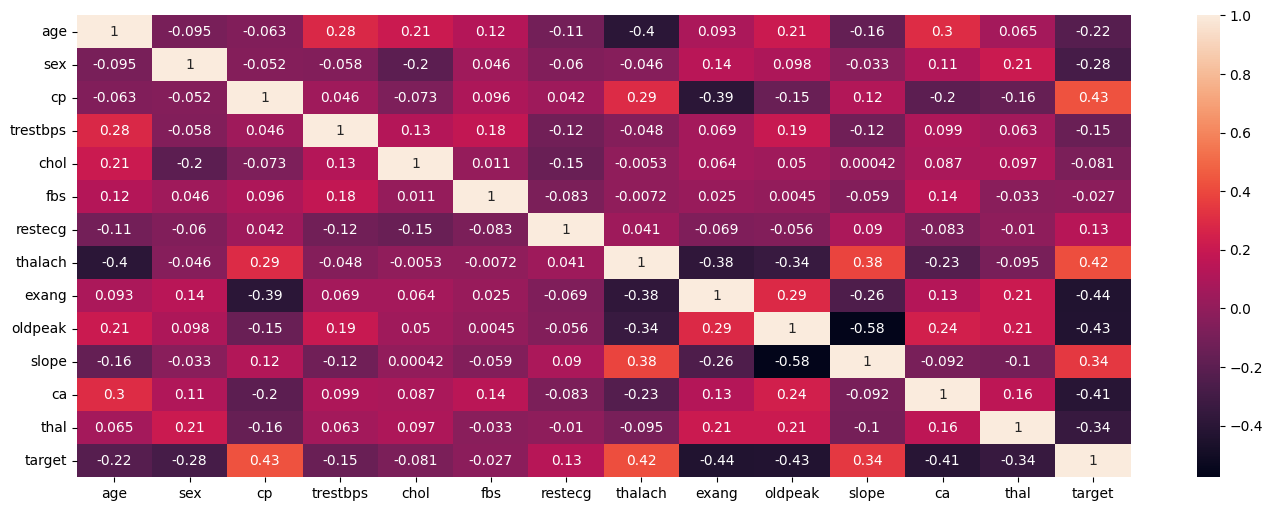

In [9]:
#Draw Correlation Matrix
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True)

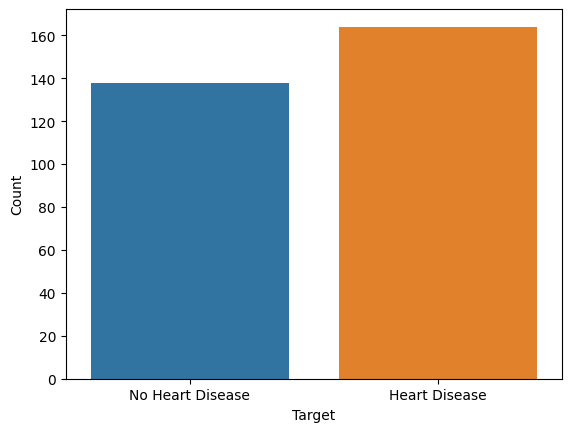

In [10]:
#How many people have heart disease, and how many people dont have heart disease in this dataset
sns.countplot(x='target',data=df,hue='target',legend=False)
plt.xticks([0,1],['No Heart Disease','Heart Disease'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

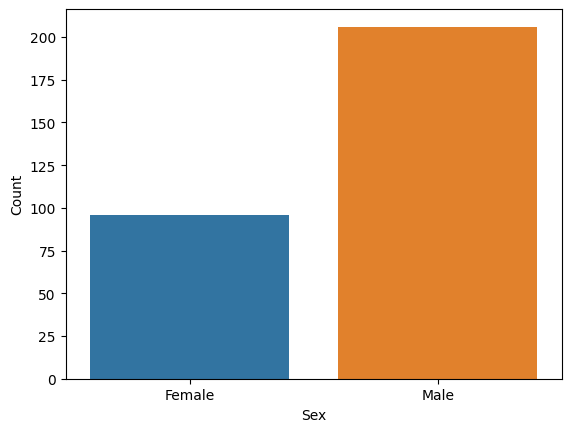

In [11]:
#Find Count of male and female in dataset 
sns.countplot(x='sex',data=df,hue='sex',palette='tab10',legend=False,)
plt.xticks([0,1],['Female','Male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

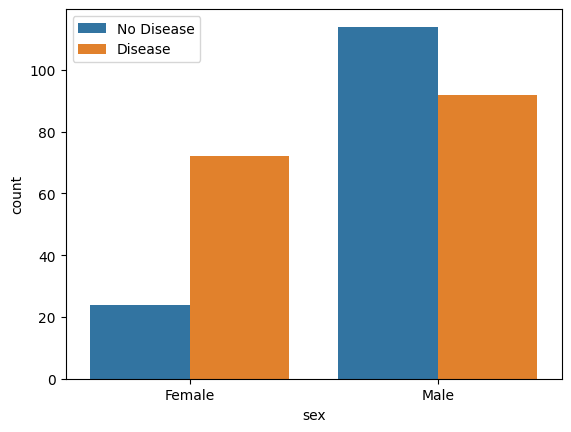

In [12]:
#Gender distribution according to target variable 
sns.countplot(x='sex',data=df,hue='target')
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

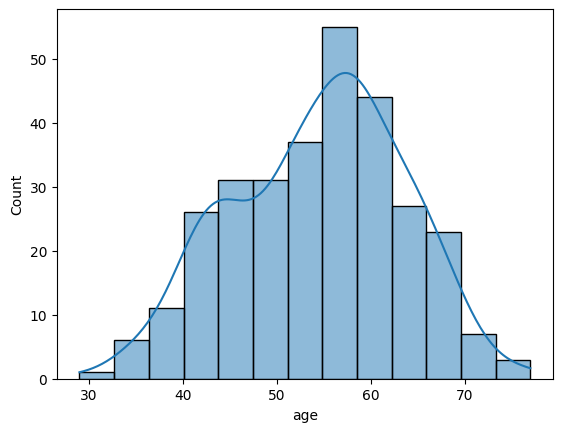

In [13]:
#Check Age distribution 
sns.histplot(df['age'],kde=True)
plt.show()

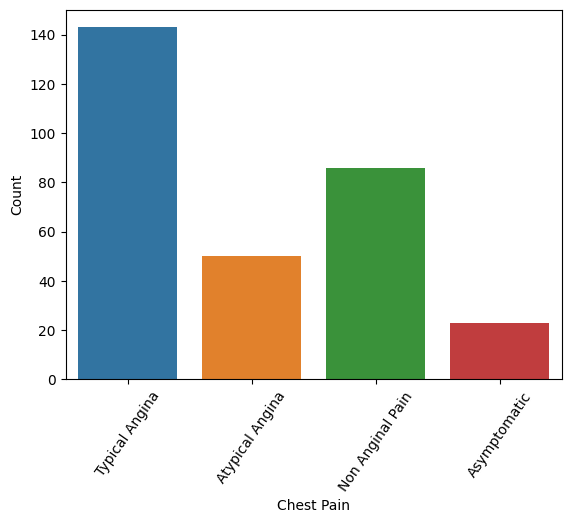

In [14]:
#Check Chest Pain type
sns.countplot(x='cp',data=df,hue='cp',legend=False,palette='tab10')
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.xlabel('Chest Pain',ha='center')
plt.xticks(rotation=55)
plt.ylabel('Count')
plt.show()

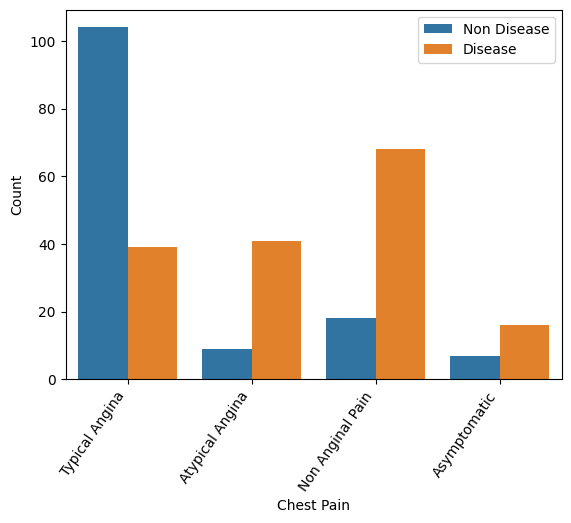

In [15]:
#Show chest pain distribution as per target variable 
sns.countplot(x='cp',data=df,hue='target',palette='tab10')
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.legend(['Non Disease','Disease'])
plt.xlabel('Chest Pain')
plt.xticks(rotation=55,ha='right')
plt.ylabel('Count')
plt.show()

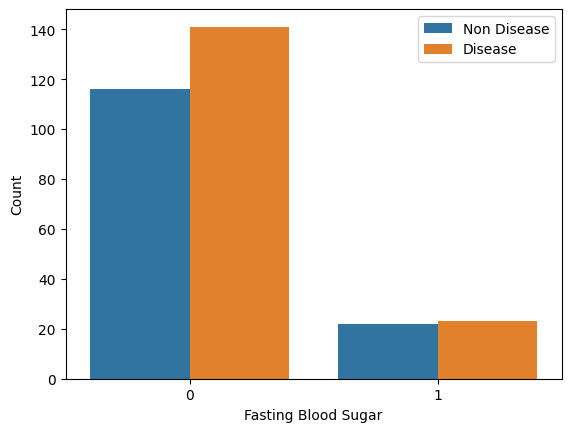

In [16]:
#Show fasting blood sugar distribution according to target variable 
sns.countplot(x='fbs',data=df,hue='target',palette='tab10')
plt.legend(['Non Disease','Disease'])
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()

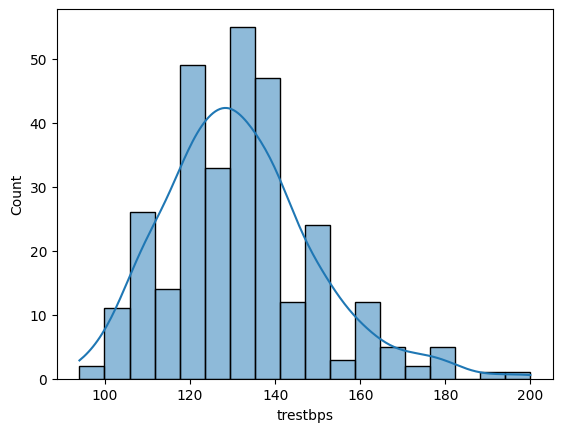

In [17]:
#Check Resting Blood Pressure Distribution
sns.histplot(df['trestbps'],kde=True)
plt.show()

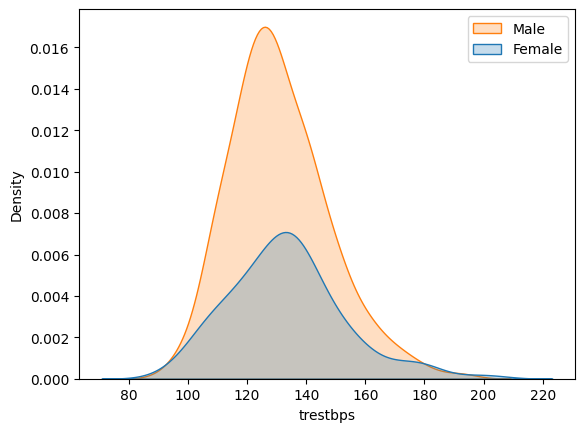

In [18]:
#Compare resting Blood Pressure as per sex column
sns.kdeplot(x='trestbps',data=df,hue='sex',fill=True)
plt.legend(labels=['Male','Female'])

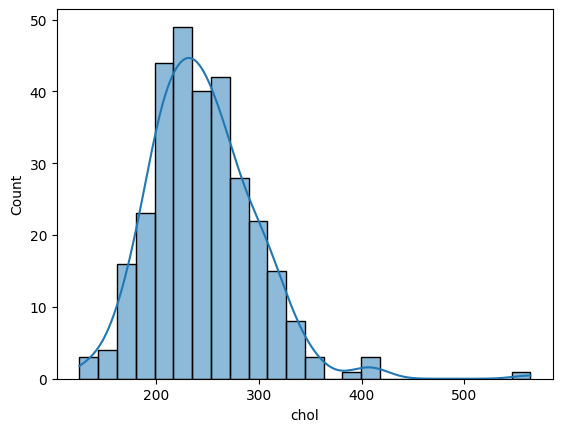

In [19]:
#Show distribution of Serum Cholesterol
sns.histplot(data=df,x='chol',kde=True)
plt.show()

In [20]:
#Plot Continous Variables
cate_val=[]
cont_val=[]
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

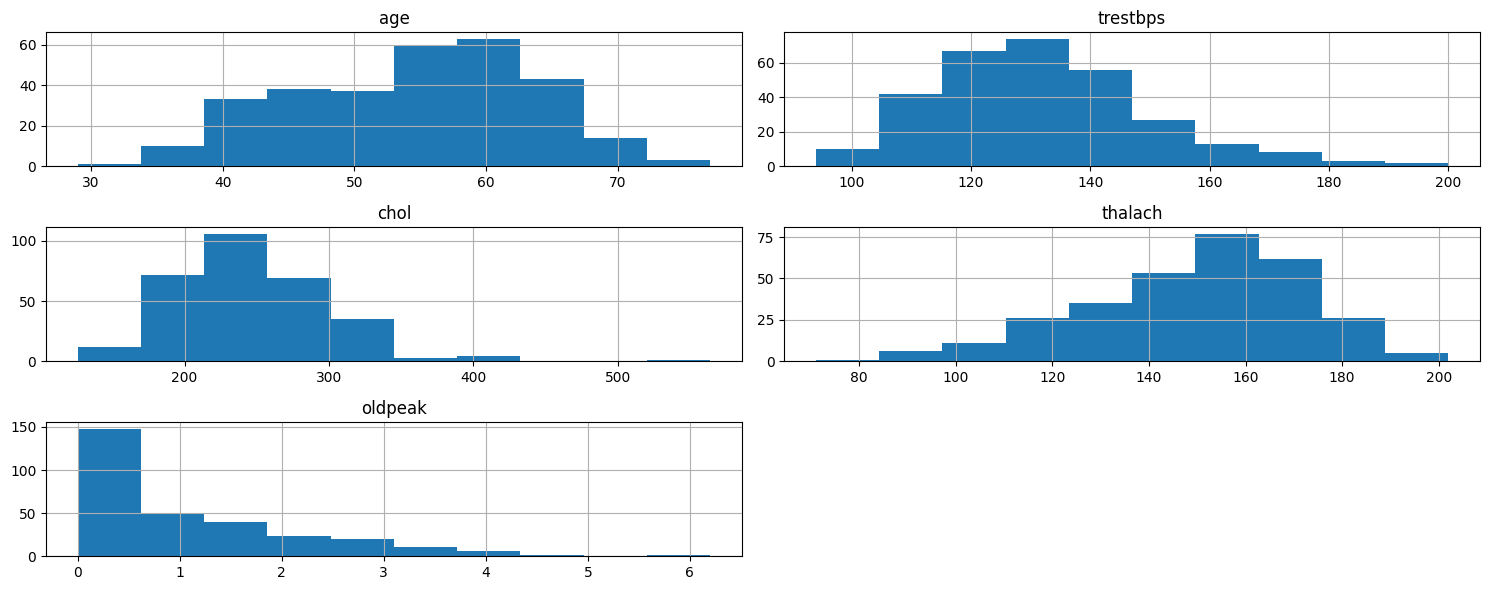

In [21]:
df.hist(cont_val,figsize=(15,6))
plt.tight_layout()
plt.show()

<font size='2'><b>ML</b></font>

In [22]:
#Main Goal is to predict the following dataset
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [23]:
#Data Preprocessing 
#1st we have to necode categorical values 
cate_val.remove('sex')
cate_val.remove('target')
#These contain 0 or 1 by default

In [24]:
df=pd.get_dummies(df,columns=cate_val,drop_first=True,dtype='int')

In [25]:
#Feature Scaling for continuous variables that are not in the same scale 
from sklearn.preprocessing import StandardScaler

In [26]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [27]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [28]:
#Splitting Dataset into training and testing 
X=df.drop('target',axis=1)
y=df['target']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
#Classification problem/ Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
log=LogisticRegression().fit(X_train,y_train)
y_pred1=log.predict(X_test)
log_score=accuracy_score(y_test,y_pred1)

In [33]:
#SVC
from sklearn.svm import SVC
svm=SVC().fit(X_train,y_train)
y_pred2=svm.predict(X_test)
svm_score=accuracy_score(y_test,y_pred2)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [36]:
knn=KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred3=knn.predict(X_test)
knn_score=accuracy_score(y_test,y_pred3)

In [37]:
#Non Linear ML Algoriths 
#Preprocessing is not needed in here 
df_1=pd.read_csv('heart.csv')

In [38]:
df_1=df_1.drop_duplicates()

In [39]:
X1=df_1.drop(columns=['target'],axis=1)
y1=df_1['target']

In [40]:
X1_Train,X1_Test,y1_Train,y1_Test=train_test_split(X1,y1,test_size=0.2,random_state=42)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt=DecisionTreeClassifier().fit(X1_Train,y1_Train)
y_pred4=dt.predict(X1_Test)
dt_score=accuracy_score(y1_Test,y_pred4)

In [43]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [44]:
rf=RandomForestClassifier().fit(X1_Train,y1_Train)
y_pred5=rf.predict(X1_Test)
rf_score=accuracy_score(y1_Test,y_pred5)

In [45]:
gb=GradientBoostingClassifier().fit(X1_Train,y1_Train)
y_pred6=gb.predict(X1_Test)
gb_score=accuracy_score(y1_Test,y_pred6)

In [46]:
final=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],"Accuracy_Score":[log_score,svm_score,knn_score,dt_score,rf_score,gb_score]})

In [47]:
final

,Models,Accuracy_Score
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.803279
3,DT,0.721311
4,RF,0.868852
5,GB,0.803279


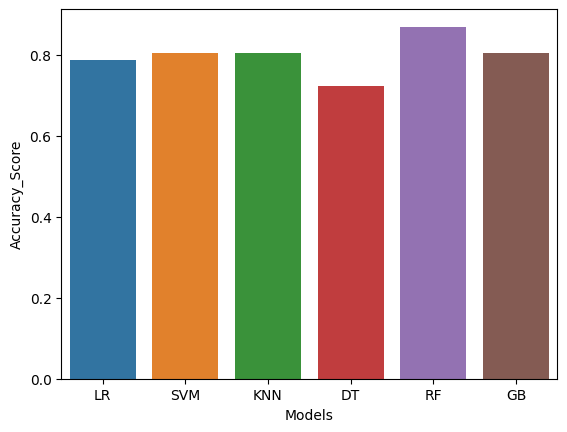

In [48]:
sns.barplot(data=final,x="Models",y='Accuracy_Score',hue='Models',legend=False);

In [49]:
#So we take RandomForestClassifier as our final model 
df=pd.read_csv('heart.csv')
X=df.drop('target',axis=1)
y=df['target']
rf=RandomForestClassifier().fit(X,y)

In [50]:
p=rf.predict(new_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')

No Disease
